In [ ]:
import pandas as pd

# Correct file path with full file name
file_path ='./data/All_Stocks_Data.csv' 
# Note The above `file_path` is provided as a reference to indicate where the file is stored in the local desktop folder. Users should replace `file_path` with the actual path to their own file, ensuring it matches their system's directory structure. 


# Load the CSV file
data = pd.read_csv(file_path)

# Preview the first few rows
print(data.head())



      Unnamed: 0      symbol  2021-11-04  2021-11-03  2021-11-02  2021-10-29  \
0  closing_price   20MICRONS       59.75       58.40       58.55       58.55   
1  closing_price  21STCENMGM       58.75       57.60       56.50       54.35   
2  closing_price  3IINFOTECH         NaN         NaN         NaN         NaN   
3  closing_price     3MINDIA    26669.00    26758.15    26355.15    25400.70   
4  closing_price      3PLAND       13.20       13.10       12.50       12.70   

   2021-10-28  2021-10-27  2021-10-26  2021-10-25  ...  2020-01-14  \
0       59.35       60.15       57.85       56.90  ...       36.05   
1       53.30       52.30       51.30       50.30  ...       16.20   
2         NaN         NaN         NaN         NaN  ...        2.55   
3    25907.45    25962.75    26146.75    26146.90  ...    21931.50   
4       13.20       13.20       12.90       12.95  ...        7.05   

   2020-01-13  2020-01-10  2020-01-09  2020-01-08  2020-01-07  2020-01-06  \
0       35.90        

In [10]:
import pandas as pd

# Fill missing values using forward fill
data = data.ffill()

# Drop stocks with too many missing values (optional)
data.dropna(axis=0, how='all', inplace=True)

# Preview cleaned data
print(data.head())



      Unnamed: 0      symbol  2021-11-04  2021-11-03  2021-11-02  2021-10-29  \
0  closing_price   20MICRONS       59.75       58.40       58.55       58.55   
1  closing_price  21STCENMGM       58.75       57.60       56.50       54.35   
2  closing_price  3IINFOTECH       58.75       57.60       56.50       54.35   
3  closing_price     3MINDIA    26669.00    26758.15    26355.15    25400.70   
4  closing_price      3PLAND       13.20       13.10       12.50       12.70   

   2021-10-28  2021-10-27  2021-10-26  2021-10-25  ...  2020-01-14  \
0       59.35       60.15       57.85       56.90  ...       36.05   
1       53.30       52.30       51.30       50.30  ...       16.20   
2       53.30       52.30       51.30       50.30  ...        2.55   
3    25907.45    25962.75    26146.75    26146.90  ...    21931.50   
4       13.20       13.20       12.90       12.95  ...        7.05   

   2020-01-13  2020-01-10  2020-01-09  2020-01-08  2020-01-07  2020-01-06  \
0       35.90        

In [11]:
# Inspect column names and data types
print(data.info())

# Check basic statistics for numerical columns
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Columns: 459 entries, Unnamed: 0 to 2020-01-01
dtypes: float64(457), object(2)
memory usage: 8.5+ MB
None
        2021-11-04    2021-11-03    2021-11-02    2021-10-29    2021-10-28  \
count   2435.00000   2435.000000   2435.000000   2435.000000   2435.000000   
mean     716.19731    811.871158    779.124867    758.685105    761.748846   
std     2530.64382   2568.883643   2543.212764   2503.279699   2514.822870   
min        0.85000      0.800000      0.750000      0.700000      0.750000   
25%       39.80000     42.625000     48.965000     48.050000     48.050000   
50%      171.90000    186.900000    195.100000    190.800000    190.850000   
75%      625.90000    646.450000    670.350000    602.900000    595.850000   
max    78412.50000  77968.900000  78585.200000  77308.150000  77609.350000   

         2021-10-27    2021-10-26    2021-10-25    2021-10-22    2021-10-21  \
count   2435.000000   2435.000000   24

In [12]:
# Rename the column 'Unnamed: 0' to 'price_type'
data.rename(columns={'Unnamed: 0': 'price_type'}, inplace=True)

# Verify the change
print(data.head())


      price_type      symbol  2021-11-04  2021-11-03  2021-11-02  2021-10-29  \
0  closing_price   20MICRONS       59.75       58.40       58.55       58.55   
1  closing_price  21STCENMGM       58.75       57.60       56.50       54.35   
2  closing_price  3IINFOTECH       58.75       57.60       56.50       54.35   
3  closing_price     3MINDIA    26669.00    26758.15    26355.15    25400.70   
4  closing_price      3PLAND       13.20       13.10       12.50       12.70   

   2021-10-28  2021-10-27  2021-10-26  2021-10-25  ...  2020-01-14  \
0       59.35       60.15       57.85       56.90  ...       36.05   
1       53.30       52.30       51.30       50.30  ...       16.20   
2       53.30       52.30       51.30       50.30  ...        2.55   
3    25907.45    25962.75    26146.75    26146.90  ...    21931.50   
4       13.20       13.20       12.90       12.95  ...        7.05   

   2020-01-13  2020-01-10  2020-01-09  2020-01-08  2020-01-07  2020-01-06  \
0       35.90        

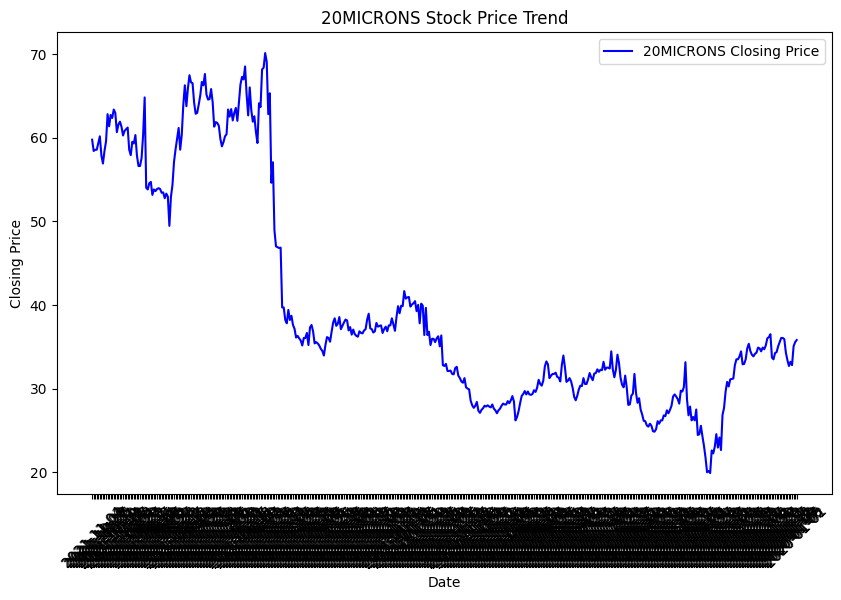

In [13]:
import matplotlib.pyplot as plt

# Extract the dates from column names and closing prices for the stock
dates = data.columns[2:]  # Skipping 'price_type' and 'symbol' columns
closing_prices = data.loc[data['symbol'] == '20MICRONS', dates].values[0]

# Plot the stock price trend
plt.figure(figsize=(10, 6))
plt.plot(dates, closing_prices, label='20MICRONS Closing Price', color='blue')
plt.title('20MICRONS Stock Price Trend')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<Figure size 1200x600 with 0 Axes>

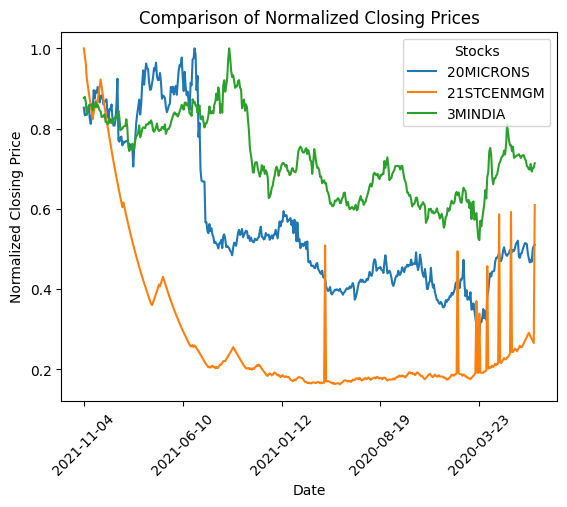

In [16]:
import matplotlib.pyplot as plt

# Normalize closing prices for selected stocks
stocks_to_compare = ['20MICRONS', '21STCENMGM', '3MINDIA']
selected_stocks = data[data['symbol'].isin(stocks_to_compare)]
closing_prices = selected_stocks.iloc[:, 2:]  # Extract only closing prices
normalized_prices = closing_prices / closing_prices.max(axis=1).values[:, None]  # Normalize to [0, 1]
normalized_prices.index = selected_stocks['symbol']

# Transpose for plotting
normalized_prices_transposed = normalized_prices.T

# Plot the normalized data
plt.figure(figsize=(12, 6))
normalized_prices_transposed.plot()
plt.title('Comparison of Normalized Closing Prices')
plt.xlabel('Date')
plt.ylabel('Normalized Closing Price')
plt.xticks(rotation=45)
plt.legend(title='Stocks')
plt.show()



0    0.035161
1    0.204975
3    0.021255
dtype: float64


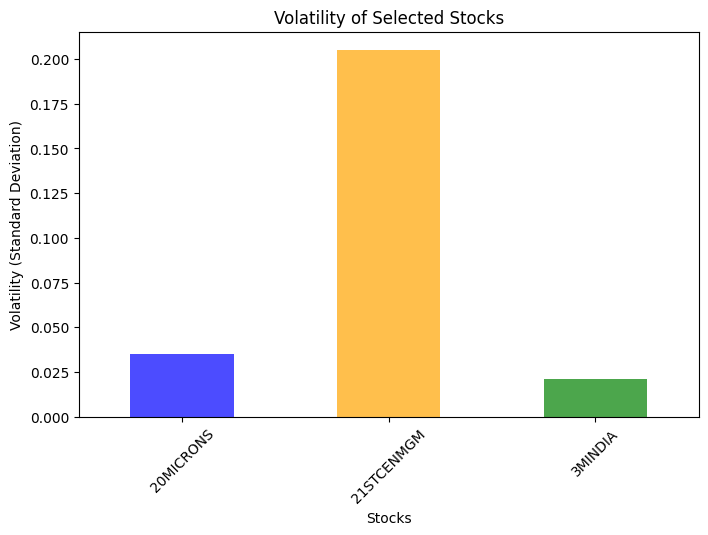

In [17]:
# Calculate daily percentage changes (returns) for selected stocks
daily_returns = closing_prices.pct_change(axis=1)  # Percentage change along dates

# Calculate standard deviation of daily returns (volatility)
volatility = daily_returns.std(axis=1)

# Print volatility for selected stocks
print(volatility)

# Visualize volatility using a bar chart
plt.figure(figsize=(8, 5))
volatility.plot(kind='bar', color=['blue', 'orange', 'green'], alpha=0.7)
plt.title('Volatility of Selected Stocks')
plt.xlabel('Stocks')
plt.ylabel('Volatility (Standard Deviation)')
plt.xticks(ticks=range(len(stocks_to_compare)), labels=stocks_to_compare, rotation=45)
plt.show()


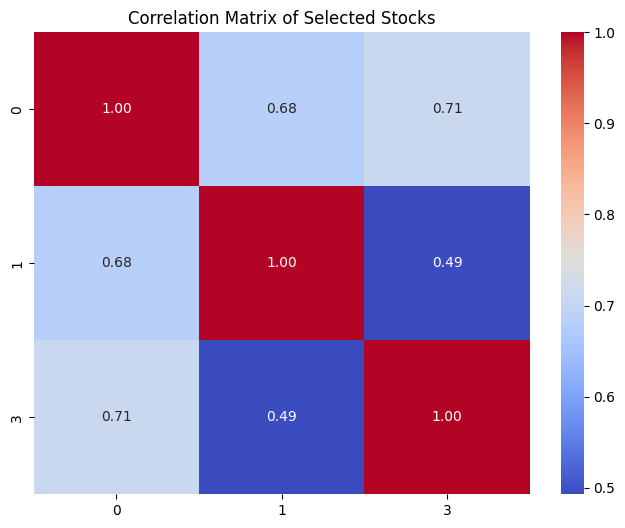

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for the selected stocks
correlation_matrix = closing_prices.T.corr()

# Visualize the matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Selected Stocks')
plt.show()


In [21]:
# Create a dictionary mapping stock symbols to sectors
sector_mapping = {
    '20MICRONS': 'SectorA',
    '21STCENMGM': 'SectorB',
    '3MINDIA': 'SectorC',
    # Add mappings for other stocks here...
}

# Map the 'sector' column based on the 'symbol' column
data['sector'] = data['symbol'].map(sector_mapping)

# Verify the updated DataFrame
print(data[['symbol', 'sector']].head())


       symbol   sector
0   20MICRONS  SectorA
1  21STCENMGM  SectorB
2  3IINFOTECH      NaN
3     3MINDIA  SectorC
4      3PLAND      NaN


In [24]:
# Replace missing values (NaN) in the 'sector' column with 'Unknown'
data['sector'] = data['symbol'].map(sector_mapping)  # Map sectors based on symbol
data['sector'] = data['sector'].fillna('Unknown')    # Fill missing values with 'Unknown'

# Verify the updated 'sector' column
print(data[['symbol', 'sector']].head())


       symbol   sector
0   20MICRONS  SectorA
1  21STCENMGM  SectorB
2  3IINFOTECH  Unknown
3     3MINDIA  SectorC
4      3PLAND  Unknown


<Figure size 1200x600 with 0 Axes>

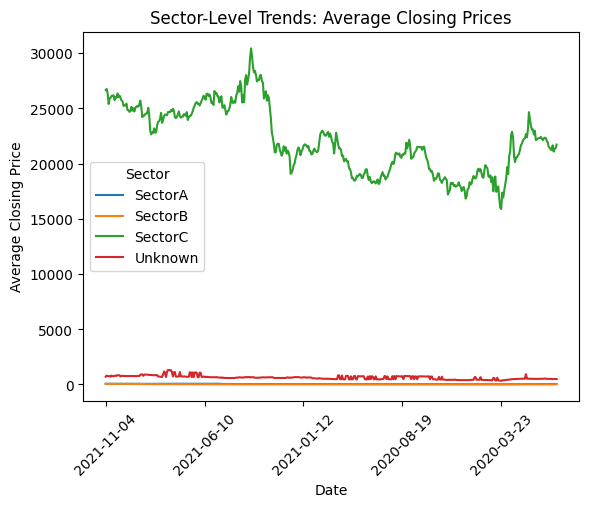

In [26]:
# Group by 'sector' and calculate mean for only numeric columns
grouped_sectors = data.groupby('sector').mean(numeric_only=True)

# Transpose for better visualization of dates vs. sectors
grouped_sectors_transposed = grouped_sectors.T

# Plot the average closing prices for each sector
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
grouped_sectors_transposed.plot(kind='line')
plt.title('Sector-Level Trends: Average Closing Prices')
plt.xlabel('Date')
plt.ylabel('Average Closing Price')
plt.legend(title='Sector')
plt.xticks(rotation=45)
plt.show()


In [6]:
# Drop unnecessary columns (if any) like 'Unnamed: 0'
data_cleaned = data.drop(columns=['Unnamed: 0'], errors='ignore')

# Reshape the dataset: Convert all date columns into rows
reshaped_data = data_cleaned.melt(id_vars=['symbol'], var_name='date', value_name='closing_price')
print("Fixed Reshaped Data Preview:")
print(reshaped_data.head())



Fixed Reshaped Data Preview:
       symbol        date  closing_price
0   20MICRONS  2021-11-04          59.75
1  21STCENMGM  2021-11-04          58.75
2  3IINFOTECH  2021-11-04            NaN
3     3MINDIA  2021-11-04       26669.00
4      3PLAND  2021-11-04          13.20


In [7]:
# Calculate the average closing price for each stock
average_prices = reshaped_data.groupby('symbol')['closing_price'].mean()
print("\nAverage Closing Prices:")
print(average_prices.sort_values(ascending=False).head(10))  # Display top 10 stocks by average price



Average Closing Prices:
symbol
MRF           72704.970788
HONAUT        35716.637746
PAGEIND       25419.224070
SHREECEM      24412.224398
3MINDIA       22148.724617
NESTLEIND     17139.332166
NIFTYEES      17070.263992
ABBOTINDIA    16269.133589
BOSCHLTD      13585.281291
TASTYBITE     13133.257549
Name: closing_price, dtype: float64


In [8]:
# Filter the reshaped data for only the top 10 performing stocks
filtered_data = reshaped_data[reshaped_data['symbol'].isin(average_prices.sort_values(ascending=False).head(10).index)]

# Preview the filtered data
print("Filtered Data Preview:")
print(filtered_data.head())


Filtered Data Preview:
          symbol        date  closing_price
3        3MINDIA  2021-11-04       26669.00
22    ABBOTINDIA  2021-11-04       20295.05
260     BOSCHLTD  2021-11-04       17779.85
680       HONAUT  2021-11-04       43291.30
1109         MRF  2021-11-04       78412.50


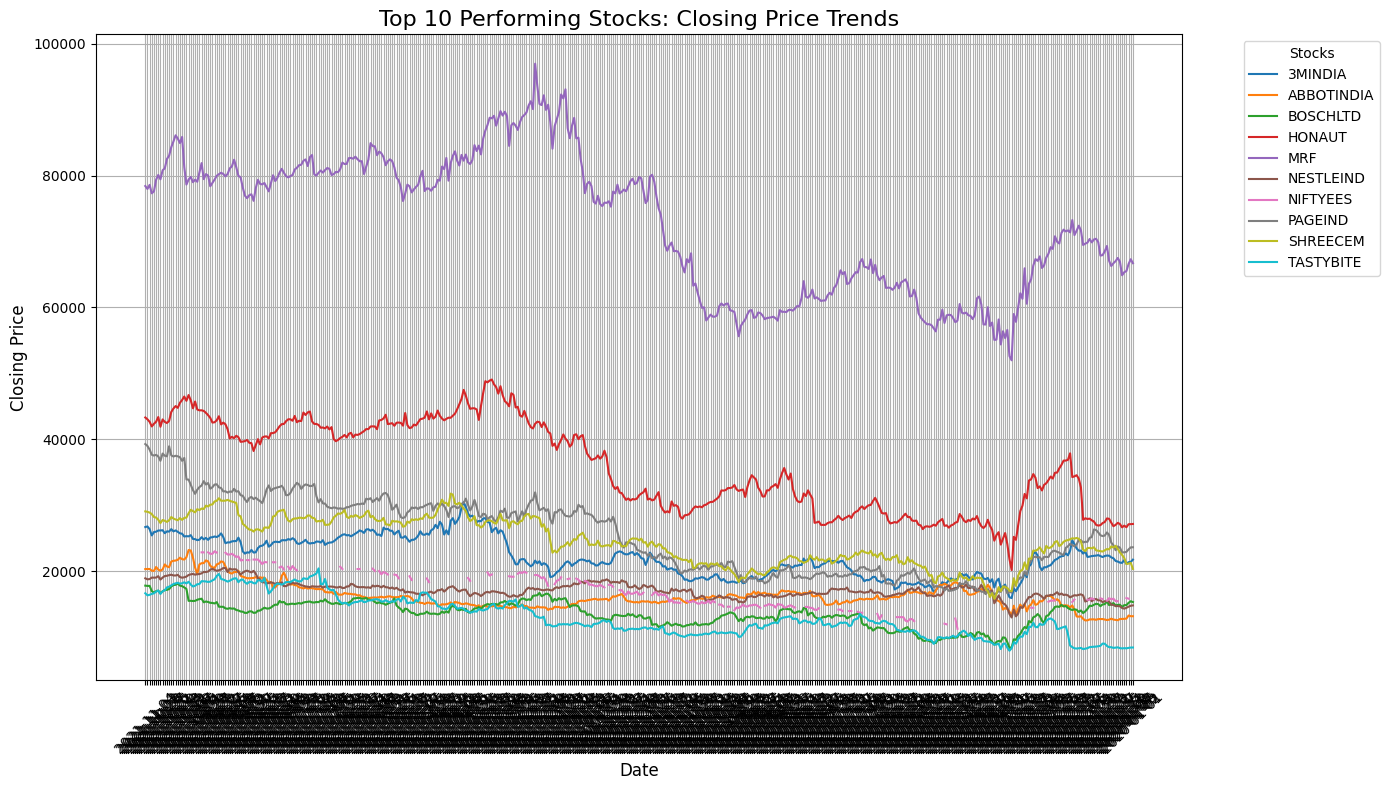

In [9]:
# Plot the closing price trends for the top 10 performing stocks
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
for stock in filtered_data['symbol'].unique():
    stock_data = filtered_data[filtered_data['symbol'] == stock]
    plt.plot(stock_data['date'], stock_data['closing_price'], label=stock)

# Customize the chart
plt.title('Top 10 Performing Stocks: Closing Price Trends', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Closing Price', fontsize=12)
plt.legend(title="Stocks", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.show()


In [10]:
# Calculate the standard deviation of closing prices for each stock
volatility = reshaped_data.groupby('symbol')['closing_price'].std()

# Sort stocks by volatility in descending order
most_volatile_stocks = volatility.sort_values(ascending=False).head(10)
least_volatile_stocks = volatility.sort_values(ascending=True).head(10)

print("\nMost Volatile Stocks (Standard Deviation):")
print(most_volatile_stocks)

print("\nLeast Volatile Stocks (Standard Deviation):")
print(least_volatile_stocks)



Most Volatile Stocks (Standard Deviation):
symbol
MRF           10454.593514
EICHERMOT      7446.057489
HONAUT         6881.274797
PAGEIND        5816.562543
DIXON          4408.182188
BAJAJFINSV     3810.452390
SHREECEM       3654.299101
TASTYBITE      3146.454787
3MINDIA        2996.215768
NIFTYEES       2910.015186
Name: closing_price, dtype: float64

Least Volatile Stocks (Standard Deviation):
symbol
LIQUIDETF     0.005148
LIQUIDBEES    0.009062
SUJANAUNI     0.022048
HEALTHY       0.026077
ICICILIQ      0.034093
STAMPEDE      0.043790
CKFSL         0.045890
KSERASERA     0.062961
BLUECHIP      0.064550
AJRINFRA      0.071224
Name: closing_price, dtype: float64


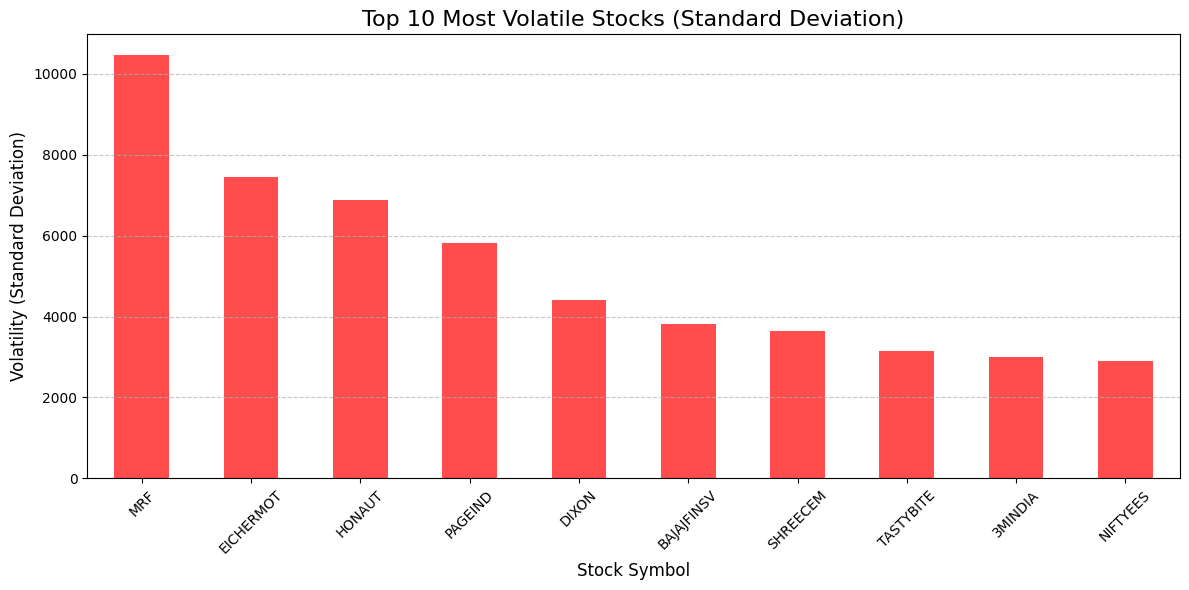

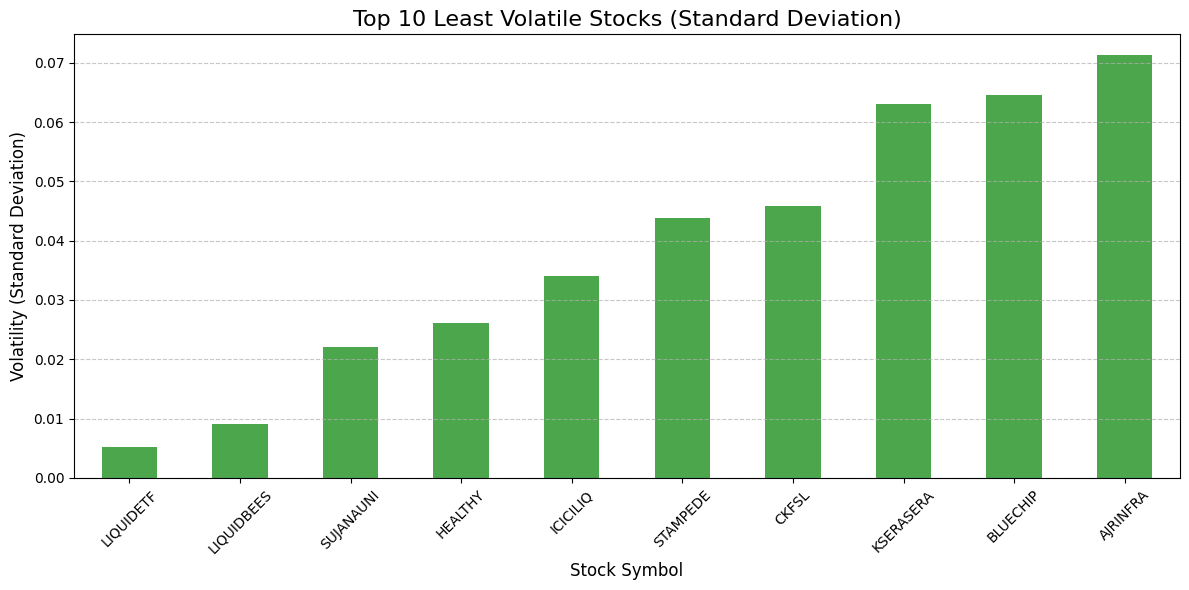

In [11]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Plot the most volatile stocks
plt.figure(figsize=(12, 6))
most_volatile_stocks.plot(kind='bar', color='red', alpha=0.7)
plt.title('Top 10 Most Volatile Stocks (Standard Deviation)', fontsize=16)
plt.xlabel('Stock Symbol', fontsize=12)
plt.ylabel('Volatility (Standard Deviation)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot the least volatile stocks
plt.figure(figsize=(12, 6))
least_volatile_stocks.plot(kind='bar', color='green', alpha=0.7)
plt.title('Top 10 Least Volatile Stocks (Standard Deviation)', fontsize=16)
plt.xlabel('Stock Symbol', fontsize=12)
plt.ylabel('Volatility (Standard Deviation)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
